In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# Aula 1: MNIST

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)

In [3]:
X, y = mnist['data'], mnist['target'].astype(float)
X.shape, y.shape

((70000, 784), (70000,))

In [4]:
np.unique(y)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

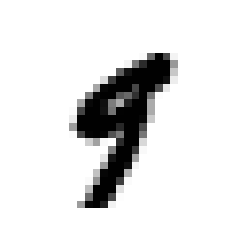

In [52]:
some_digit = X.values[36000]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap=plt.cm.binary, interpolation='nearest')
plt.axis("off")
plt.show()

In [63]:
y.values[36000]

9.0

In [60]:
X_train, X_test, y_train, y_test = X.values[:60000], X.values[60000:], y[:60000], y[60000:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

In [88]:
sufflled_index = np.random.permutation(60000)
X_train, y_train = X_train[sufflled_index], y_train[sufflled_index]

In [92]:
y_train_5 = (y_train == 9)
y_test_5 = (y_test == 9)

In [93]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [94]:
sgd_clf.predict([some_digit])

array([False])

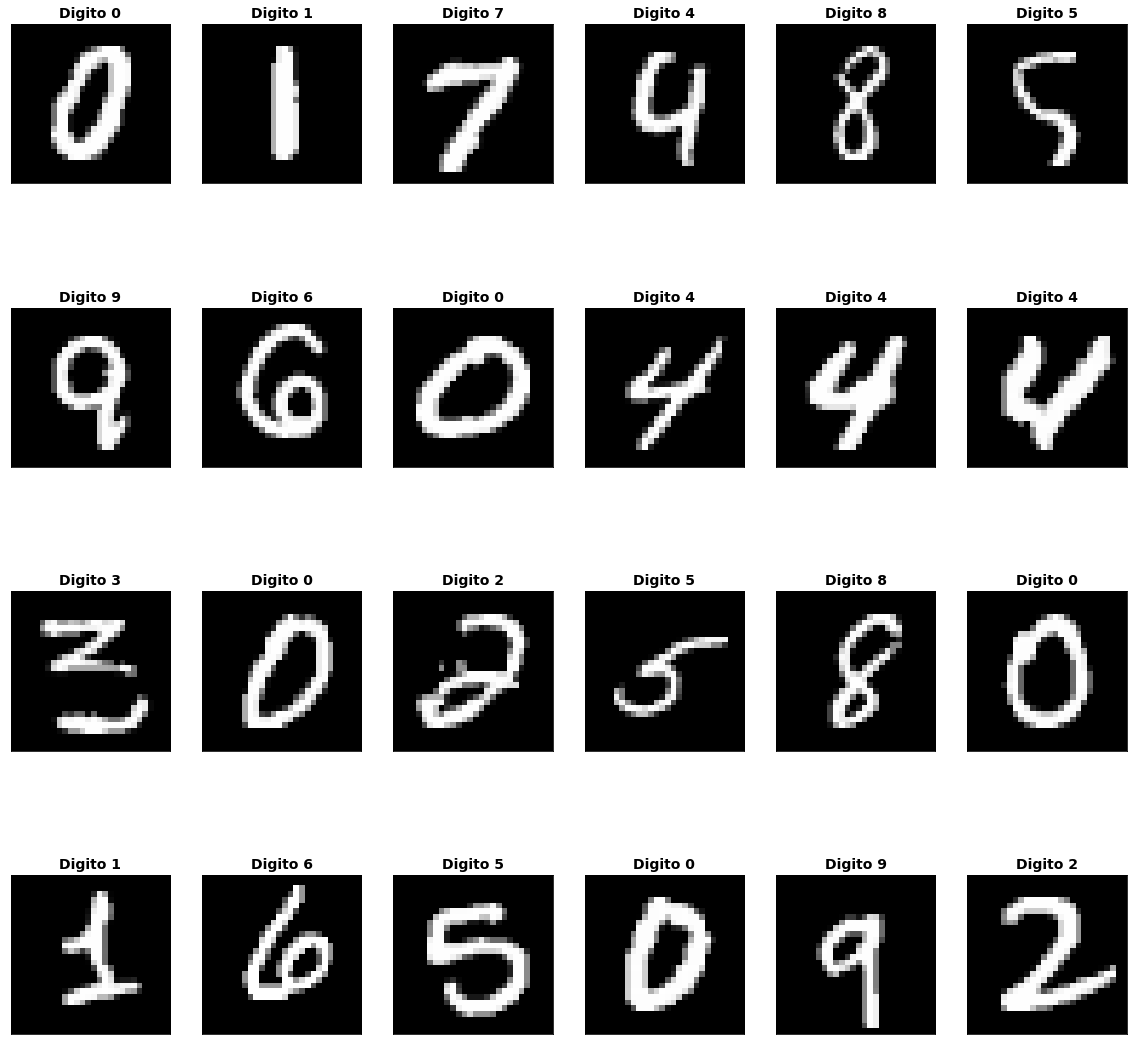

In [71]:
random_idx = np.random.randint(0, X.shape[0], size=24)

plt.figure(figsize=[20,20])

for i in range(len(random_idx)):
    idx_i = random_idx[i]
    xval = X.values[idx_i, :].reshape(28,28)
    yval = y[idx_i]

    plt.subplot(4,6, i+1)
    plt.imshow(xval, cmap=plt.cm.Greys_r)
    plt.xticks([])
    plt.yticks([])

    plt.title('Digito '+str(int(yval)), fontsize=14, fontweight='bold')

In [82]:
Xtrain, Xtest, ytrain, ytest = X[:55000], X[55000:], y[:55000], y[55000:]

In [ ]:
ytrain = np.where(ytrain == 5,1,0)
ytest = np.where(ytest == 5,1,0)
y_train_5 = (ytrain == 5)

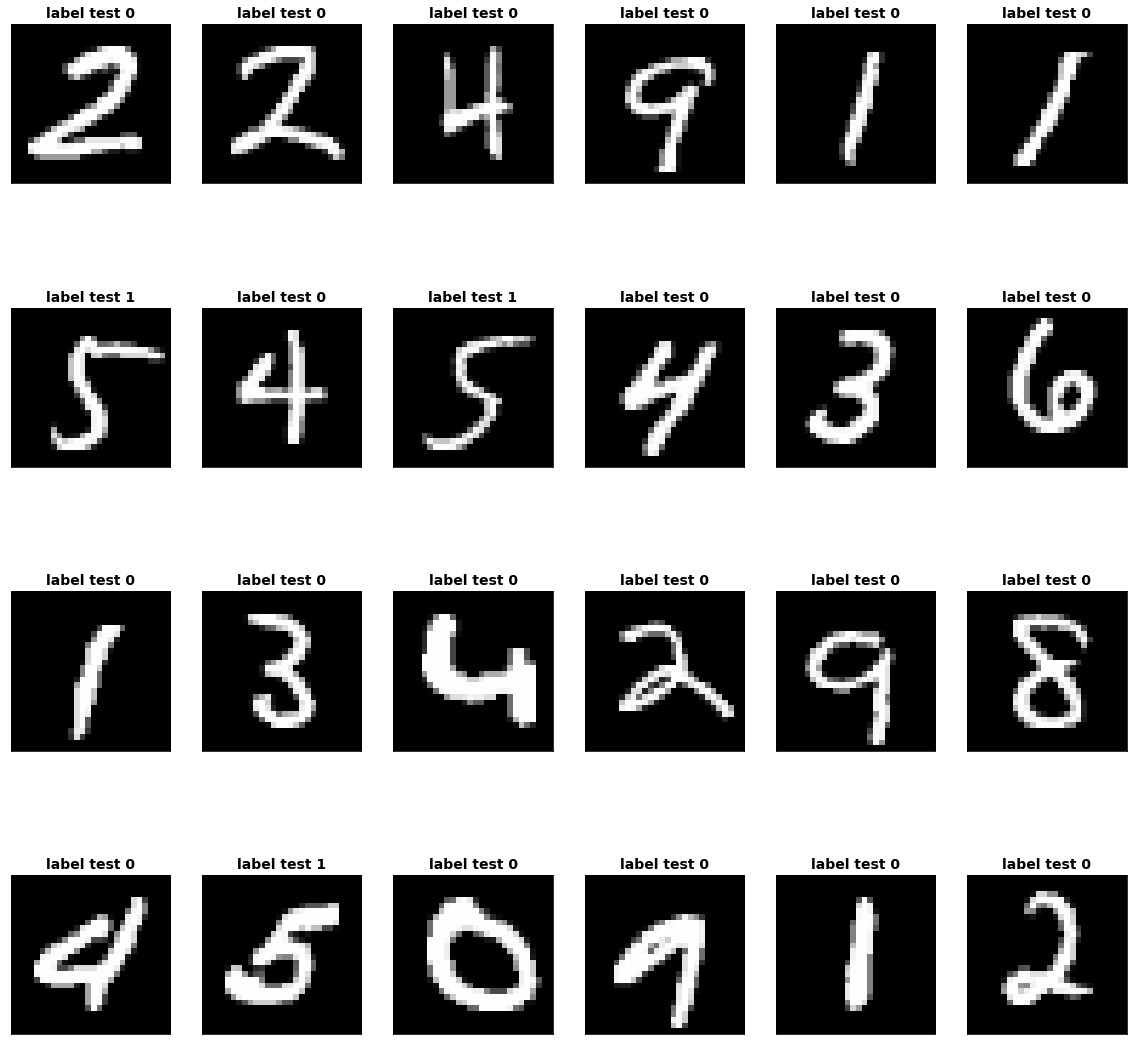

In [87]:
random_idx = np.random.randint(0, Xtrain.shape[0], size=24)

plt.figure(figsize=[20,20])

for i in range(len(random_idx)):
    idx_i = random_idx[i]
    
    xval = Xtrain.values[idx_i, :].reshape(28,28)
    yval = ytrain[idx_i]

    plt.subplot(4,6, i+1)
    plt.imshow(xval, cmap=plt.cm.Greys_r)
    plt.xticks([])
    plt.yticks([])

    plt.title('label test '+ str(yval), fontsize=14, fontweight='bold')

# Aula 2: Regressão Logística

Estimar uma probabilidade que uma instância pertence a uma classe em particular

In [95]:
def sigmoid(t):
    return 1/(1+np.exp(-t))

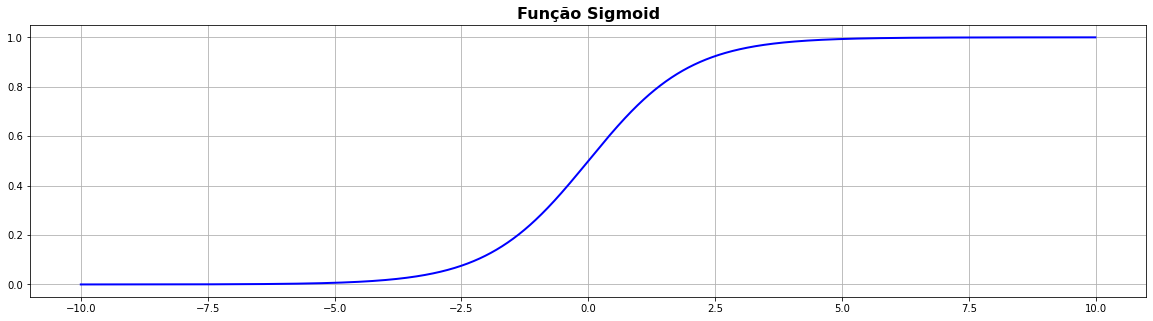

In [98]:
xlims = np.arange(-10, 10,0.01)
sigmoid_vals = [sigmoid(x) for x in xlims]

plt.figure(figsize=[20,5])
plt.title("Função Sigmoid", fontsize=16, fontweight='bold')
plt.plot(xlims, sigmoid_vals, c='blue', lw=2)
plt.grid()
plt.show()

In [99]:
import time


In [101]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(Xtrain, ytrain)

logreg.intercept_, logreg.coef_


(array([0.00011244]),
 array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         -4.09228448e-06, -9.11247590e-06, -1.68906581e-07,
         -7.03777421e-09,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00, -1.68489016e-08,
         -5.38587820e-08, -4.41903437e-06, -7.97263283e-06,
         -1.94415802e-05, -7.79392729e-06, -1.17947680e-05,
         -1.92128600e-05, -3.68878987e-04, -3.98664412e-04,
         -1.50031411e-04, -2.21507211e-04, -2.45363000e-04,
         -1.00621826e-04, -1.61875639e-04, -1.72943366e-04,
         -9.895242

In [102]:
logreg.coef_.size

784

In [103]:
logreg.predict(Xtrain)

array([1, 0, 0, ..., 0, 0, 0])

In [106]:
logreg.predict_proba(Xtrain), logreg.predict_proba(Xtrain).shape

(array([[1.59909853e-01, 8.40090147e-01],
        [9.99878649e-01, 1.21351111e-04],
        [9.99999062e-01, 9.37699350e-07],
        ...,
        [9.91642242e-01, 8.35775775e-03],
        [9.96720096e-01, 3.27990393e-03],
        [9.99729545e-01, 2.70455338e-04]]),
 (55000, 2))

In [107]:
logreg.predict_proba(Xtrain)[0, ]

array([0.15990985, 0.84009015])

In [108]:
ytrain[0]

1

In [109]:
logreg.predict(Xtrain)[:20]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [110]:
ytrain[:20]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [111]:
predicoes = logreg.predict(Xtrain)

qtd_acertos = (predicoes == ytrain).sum()
total_inst = ytrain.size

acuaria_sgd = qtd_acertos / total_inst
acuaria_sgd

0.9772545454545455

In [112]:
from sklearn.metrics import accuracy_score

In [116]:
accuracy_score(y_true = ytrain, y_pred=logreg.predict(Xtrain)).round(2)

(0.98, '%')

In [117]:
from sklearn.model_selection import cross_val_score

In [119]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.89755, 0.88005, 0.778  ])

Aula 3: Validação Cruzada Manual

In [121]:
X = np.random.randn(20).reshape(10,2).round(2)
X

array([[ 0.24,  0.37],
       [-0.99, -0.45],
       [-1.26,  1.08],
       [ 1.05,  0.33],
       [-0.24, -0.07],
       [ 0.51, -0.99],
       [ 0.07, -0.08],
       [ 0.95,  0.96],
       [ 1.43,  0.8 ],
       [ 0.26,  0.31]])

In [122]:
from sklearn.model_selection import KFold


In [125]:
kf = KFold(n_splits=3)

for train_index, val_index in kf.split(X):
    print(train_index, val_index)
    print(X[train_index])
    print()
    print(X[val_index])
    print("-"* 30)

[4 5 6 7 8 9] [0 1 2 3]
[[-0.24 -0.07]
 [ 0.51 -0.99]
 [ 0.07 -0.08]
 [ 0.95  0.96]
 [ 1.43  0.8 ]
 [ 0.26  0.31]]

[[ 0.24  0.37]
 [-0.99 -0.45]
 [-1.26  1.08]
 [ 1.05  0.33]]
------------------------------
[0 1 2 3 7 8 9] [4 5 6]
[[ 0.24  0.37]
 [-0.99 -0.45]
 [-1.26  1.08]
 [ 1.05  0.33]
 [ 0.95  0.96]
 [ 1.43  0.8 ]
 [ 0.26  0.31]]

[[-0.24 -0.07]
 [ 0.51 -0.99]
 [ 0.07 -0.08]]
------------------------------
[0 1 2 3 4 5 6] [7 8 9]
[[ 0.24  0.37]
 [-0.99 -0.45]
 [-1.26  1.08]
 [ 1.05  0.33]
 [-0.24 -0.07]
 [ 0.51 -0.99]
 [ 0.07 -0.08]]

[[0.95 0.96]
 [1.43 0.8 ]
 [0.26 0.31]]
------------------------------


In [131]:
classif__ = LogisticRegression()
lista_acuracia_treino = []
lista_acuracia_validacao = []

for train_index, val_index in kf.split(Xtrain, ytrain):
    Xtrain_folds = Xtrain.values[train_index]
    ytrain_folds = ytrain[train_index]
    Xval_fold = Xtrain.values[val_index]
    yval_fold = ytrain[val_index]

    classif__.fit(Xtrain_folds, ytrain_folds)

    pred_treino = classif__.predict(Xtrain_folds)
    pred_validacao = classif__.predict(Xval_fold)

    lista_acuracia_treino.append(accuracy_score(y_pred= pred_treino, y_true= ytrain_folds).round(2))
    lista_acuracia_validacao.append(accuracy_score(y_pred=pred_validacao, y_true=yval_fold).round(2))

print(f"Acurácia em treino: {lista_acuracia_treino}, média: {np.mean(lista_acuracia_treino)}")
print(f"Acurácia em validacao: {lista_acuracia_validacao}, média: {np.mean(lista_acuracia_validacao)}")

Acurácia em treino: [0.98, 0.98, 0.98], média: 0.98
Acurácia em validacao: [0.97, 0.97, 0.97], média: 0.9700000000000001


In [132]:
from sklearn.base import BaseEstimator

In [136]:
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [137]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.89825, 0.9042 , 0.9001 ])

# Aula 4: Métricas de Performance

In [138]:
from sklearn.model_selection import cross_val_predict


In [139]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [140]:
from sklearn.metrics import confusion_matrix

In [141]:
confusion_matrix(y_train_5, y_train_pred)

array([[50758,  3293],
       [ 5595,   354]], dtype=int64)

In [142]:
 logreg = LogisticRegression()
 logreg.fit(Xtrain, ytrain)

 confusion_matrix(ytrain, logreg.predict(Xtrain))

array([[49632,   405],
       [  846,  4117]], dtype=int64)

In [143]:
classif__N5 = Never5Classifier()
classif__N5.fit(Xtrain, ytrain)

confusion_matrix(ytrain, classif__N5.predict(Xtrain))

array([[50037,     0],
       [ 4963,     0]], dtype=int64)

In [144]:
from sklearn.metrics import precision_score, recall_score


In [145]:
precision_score(y_train_5, y_train_pred)


0.09706608171099534

In [146]:
recall_score(y_train_5, y_train_pred)

0.05950579929399899

In [152]:
print("LogReg:")
print(f"Recal: {recall_score(ytrain, logreg.predict(Xtrain))}")
print(f"Precision: {precision_score(ytrain, logreg.predict(Xtrain))}")
print()
print("Classificador Ingênuo")
print(f"Recall: {recall_score(ytrain, classif__N5.predict(Xtrain))}")
print(f"Precision: {precision_score(ytrain, classif__N5.predict(Xtrain))}")

LogReg:
Recal: 0.8295385855329438
Precision: 0.910437859354268

Classificador Ingênuo
Recall: 0.0
Precision: 0.0


In [147]:
from sklearn.metrics import f1_score

In [153]:
f1_score(y_train_5, y_train_pred).round(2)*1000

70.0

In [154]:
print(f"F1 Score - Reg. Log: {f1_score(ytrain, logreg.predict(Xtrain))}")
print(f"F1 Score - Class Ing: {f1_score(ytrain, classif__N5.predict(Xtrain))}")

F1 Score - Reg. Log: 0.8681075382182393
F1 Score - Class Ing: 0.0


In [161]:
# Função de Validação Cruzada
 
def validacao_cruzada(
    classificador,
    X,
    y,
    metrica,
    num_folds,
    print_info = False,
    nome_metrica = False
):
    lista_metrica_treino = []
    lista_metrica_validacao = []

    kf = KFold(n_splits= num_folds)

    for train_index, val_index in kf.split(X, y):
        Xtrain_folds = X.values[train_index]
        ytrain_folds = y[train_index]
        Xval_fold = X.values[val_index]
        yval_fold = y[val_index]

        classificador.fit(Xtrain_folds, ytrain_folds)

        pred_treino = classificador.predict(Xtrain_folds)
        pred_validacao = classificador.predict(Xval_fold)

        lista_metrica_treino.append(accuracy_score(y_pred= pred_treino, y_true= ytrain_folds))
        lista_metrica_validacao.append(accuracy_score(y_pred=pred_validacao, y_true=yval_fold))

    if print_info:
        print(f"Métrica: {nome_metrica}")
        print(f"Média treino: {np.mean(lista_metrica_treino).round(2)}")
        print(f"Média validação: {np.mean(lista_metrica_validacao).round(2)}")

    return lista_metrica_treino, lista_metrica_validacao

In [162]:
for metrica, nome_metrica in zip([precision_score, recall_score, f1_score], ['Precision', 'Recall', 'F1']):
    l1, l2 = validacao_cruzada(
        classificador=LogisticRegression(),
        X = Xtrain,
        y = ytrain,
        metrica = metrica,
        num_folds = 5,
        print_info = True,
        nome_metrica = nome_metrica
    )
    print()

Métrica: Precision
Média treino: 0.98
Média validação: 0.97

Métrica: Recall
Média treino: 0.98
Média validação: 0.97

Métrica: F1
Média treino: 0.98
Média validação: 0.97



In [160]:
for metrica, nome_metrica in zip([precision_score, recall_score, f1_score], ['Precision', 'Recall', 'F1']):
    l1, l2 = validacao_cruzada(
        classificador=Never5Classifier(),
        X = Xtrain,
        y = ytrain,
        metrica = metrica,
        num_folds = 5,
        print_info = True,
        nome_metrica = nome_metrica
    )
    print()

Métrica: Precision
Média treino: 0.9099999999999999
Média validação: 0.9099999999999999

Métrica: Recall
Média treino: 0.9099999999999999
Média validação: 0.9099999999999999

Métrica: F1
Média treino: 0.9099999999999999
Média validação: 0.9099999999999999



# Aula 5: Trade-off 

Precision está mais relacionada com erro FALSO POSITIVO 
Recall está mais relacionada com FALSO NEGATIVO

Em uma situação real, o ideal seria os dois serem pequenos. Mas na prática, existe um trade-off: quando diminuimos um erro, acabamos por aumentar o outro, e vice versa.
Dessa forma, precisamos entender muito bem controlar esses erros e chegar a uma situação ideal onde ambos façam sentido.

In [163]:
from sklearn.linear_model import LogisticRegression

In [164]:
logreg = LogisticRegression()
logreg.fit(Xtrain, ytrain)

LogisticRegression()

In [165]:
logreg.predict(Xtrain)[:50]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0])

In [167]:
logreg.predict_proba(Xtrain).round(2)

array([[0.16, 0.84],
       [1.  , 0.  ],
       [1.  , 0.  ],
       ...,
       [0.99, 0.01],
       [1.  , 0.  ],
       [1.  , 0.  ]])

In [171]:
prob_class_1 = logreg.predict_proba(Xtrain)[:, 1]
np.where(prob_class_1 > 0.8, 1, 0)

array([1, 0, 0, ..., 0, 0, 0])

In [172]:
limiares = np.linspace(0.05, 0.95, 19)
limiares

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

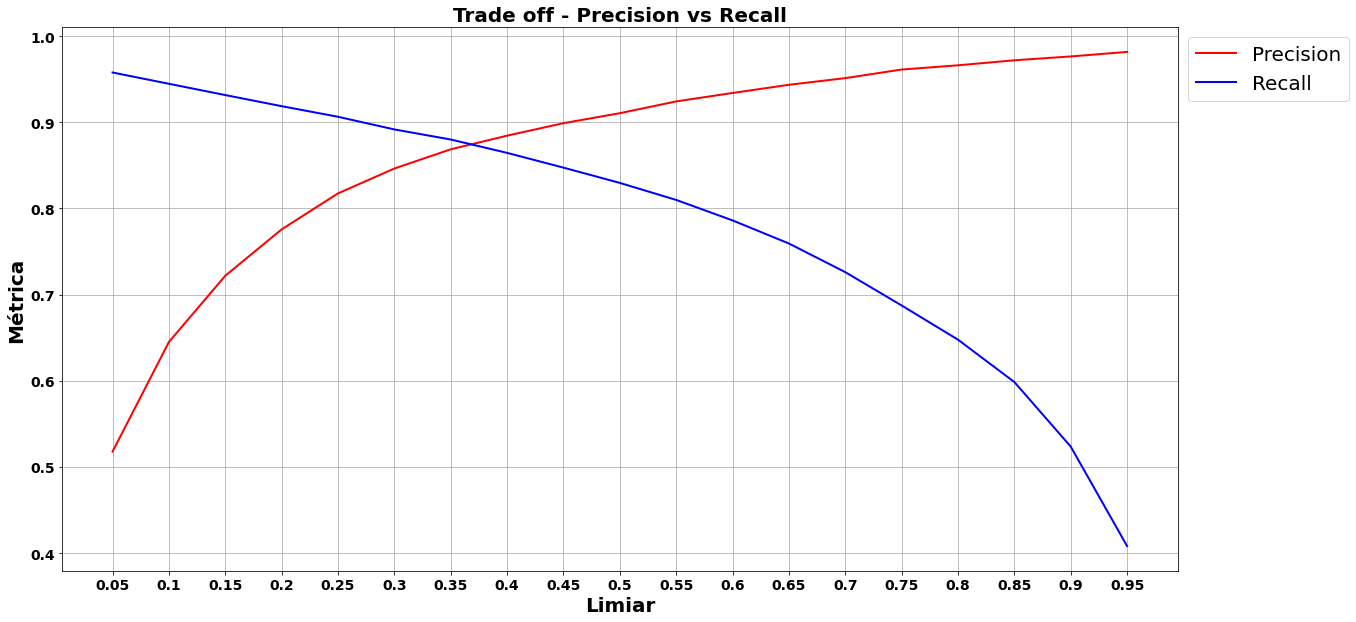

In [175]:
precision_list = []
recall_list = []

for t in limiares:
    pred_t = np.where(prob_class_1 > t, 1, 0)

    precision_t = precision_score(ytrain, pred_t)
    recall_t = recall_score(ytrain, pred_t)

    precision_list.append(precision_t)
    recall_list.append(recall_t)

plt.figure(figsize=[20,10])
plt.plot(range(len(limiares)), precision_list, c='red', label='Precision', lw=2)
plt.plot(range(len(limiares)), recall_list, c='blue', label='Recall', lw=2)
plt.xticks(range(len(limiares)), limiares.round(2), fontweight='bold', fontsize='14')
plt.yticks(fontweight='bold', fontsize='14')
plt.legend(fontsize=20, bbox_to_anchor= [1,1])
plt.grid()
plt.xlabel("Limiar", fontsize=20, fontweight='bold')
plt.ylabel("Métrica", fontsize=20, fontweight='bold')
plt.title("Trade off - Precision vs Recall",  fontsize=20, fontweight='bold')
plt.show()



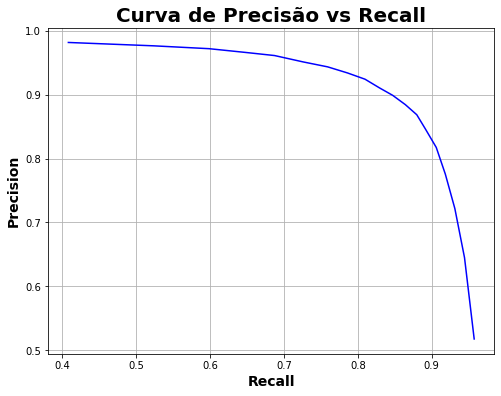

In [177]:
plt.figure(figsize=[8,6])
plt.plot(recall_list, precision_list, c='blue')
plt.xlabel("Recall", fontsize=14, fontweight='bold')
plt.ylabel("Precision", fontsize=14, fontweight='bold')
plt.title("Curva de Precisão vs Recall" , fontsize=20, fontweight='bold')
plt.grid()
plt.show()

In [180]:
for t in np.arange(0.1,1,0.1):
    print(f"Limiar: {np.round(float(t), 2)}")
    print("Confusion Matrix")

    preds = np.where(prob_class_1 > t, 1, 0)
    print(confusion_matrix(preds, ytrain))
    print("-" * 30)

Limiar: 0.1
Confusion Matrix
[[47456   275]
 [ 2581  4688]]
------------------------------
Limiar: 0.2
Confusion Matrix
[[48718   404]
 [ 1319  4559]]
------------------------------
Limiar: 0.3
Confusion Matrix
[[49233   538]
 [  804  4425]]
------------------------------
Limiar: 0.4
Confusion Matrix
[[49476   673]
 [  561  4290]]
------------------------------
Limiar: 0.5
Confusion Matrix
[[49632   846]
 [  405  4117]]
------------------------------
Limiar: 0.6
Confusion Matrix
[[49761  1062]
 [  276  3901]]
------------------------------
Limiar: 0.7
Confusion Matrix
[[49852  1360]
 [  185  3603]]
------------------------------
Limiar: 0.8
Confusion Matrix
[[49924  1749]
 [  113  3214]]
------------------------------
Limiar: 0.9
Confusion Matrix
[[49974  2365]
 [   63  2598]]
------------------------------


In [182]:
# Adaptação da função de validação cruzada

def validacao_cruzada(classificador,
                    X,
                    y,
                    metrica,
                    num_folds,
                    limiar=0.5,
                    print_info = False,
                    nome_metrica = False):

    lista_metrica_treino = []
    lista_metrica_validacao = []

    kf = KFold(n_splits= num_folds)

    for train_index, val_index in kf.split(X, y):
        Xtrain_folds = X.values[train_index]
        ytrain_folds = y[train_index]
        Xval_fold = X.values[val_index]
        yval_fold = y[val_index]

        classificador.fit(Xtrain_folds, ytrain_folds)

        prob_class_1_treino = classificador.predict_proba(Xtrain_folds)[:, 1]
        prob_class_1_validacao = classificador.predict_proba(Xval_fold)[:, 1]

        pred_treino = np.where(prob_class_1_treino > limiar, 1, 0)
        pred_validacao = np.where(prob_class_1_validacao > limiar, 1, 0)

        lista_metrica_treino.append(metrica(y_pred= pred_treino, y_true= ytrain_folds))
        lista_metrica_validacao.append(metrica(y_pred=pred_validacao, y_true=yval_fold))

    if print_info:
        print(f"Métrica: {nome_metrica}")
        print(f"Média treino: {np.mean(lista_metrica_treino).round(2)}")
        print(f"Média validação: {np.mean(lista_metrica_validacao).round(2)}")

    return lista_metrica_treino, lista_metrica_validacao

In [183]:
print("Testando o limiar 0.5:")

l1, l2 = validacao_cruzada(
    classificador=LogisticRegression(),
    X = Xtrain,
    y = ytrain,
    metrica = f1_score,
    num_folds = 5,
    limiar = 0.5,
    print_info = True,
    nome_metrica = 'F1'
)
print()

Testando o limiar 0.5:
Métrica: F1
Média treino: 0.87
Média validação: 0.85



In [184]:
print("Testando o limiar 0.5:")

l1, l2 = validacao_cruzada(
    classificador=LogisticRegression(),
    X = Xtrain,
    y = ytrain,
    metrica = f1_score,
    num_folds = 5,
    limiar = 0.15,
    print_info = True,
    nome_metrica = 'F1'
)
print()

Testando o limiar 0.5:
Métrica: F1
Média treino: 0.81
Média validação: 0.8



Testando o limiar 0.5:
Métrica: F1
Média treino: 0.67
Média validação: 0.66
Testando o limiar 0.5:
Métrica: F1
Média treino: 0.76
Média validação: 0.75
Testando o limiar 0.5:
Métrica: F1
Média treino: 0.81
Média validação: 0.8
Testando o limiar 0.5:
Métrica: F1
Média treino: 0.84
Média validação: 0.82
Testando o limiar 0.5:
Métrica: F1
Média treino: 0.86
Média validação: 0.84
Testando o limiar 0.5:
Métrica: F1
Média treino: 0.87
Média validação: 0.85
Testando o limiar 0.5:
Métrica: F1
Média treino: 0.87
Média validação: 0.85
Testando o limiar 0.5:
Métrica: F1
Média treino: 0.88
Média validação: 0.85
Testando o limiar 0.5:
Métrica: F1
Média treino: 0.87
Média validação: 0.85
Testando o limiar 0.5:
Métrica: F1
Média treino: 0.87
Média validação: 0.85
Testando o limiar 0.5:
Métrica: F1
Média treino: 0.86
Média validação: 0.84
Testando o limiar 0.5:
Métrica: F1
Média treino: 0.85
Média validação: 0.83
Testando o limiar 0.5:
Métrica: F1
Média treino: 0.84
Média validação: 0.82
Testando o li

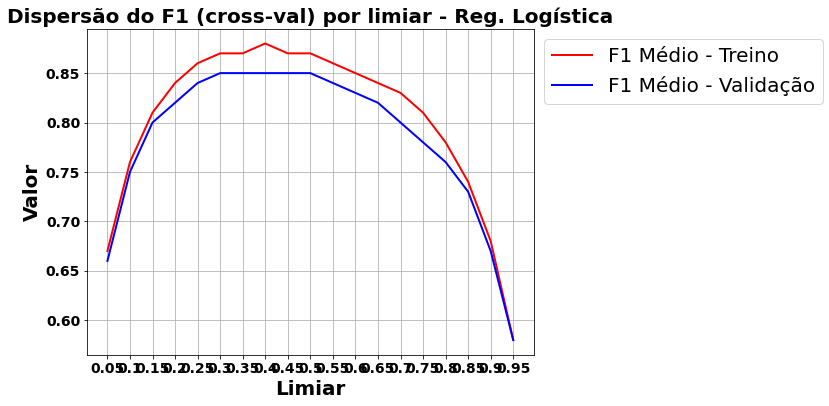

In [186]:
lista_media_metrica_treino = []
lista_media_metrica_validacao = []

for t in limiares:
    lt, lv = validacao_cruzada(
        classificador=LogisticRegression(),
        X = Xtrain,
        y = ytrain,
        metrica = f1_score,
        num_folds = 5,
        limiar = t,
        print_info = False,
        nome_metrica = 'F1'
    )

    lista_media_metrica_treino.append(np.mean(lt).round(2))
    lista_media_metrica_validacao.append(np.mean(lv).round(2))

plt.figure(figsize=[8,6])
plt.plot(range(len(limiares)), lista_media_metrica_treino, c='red', label='F1 Médio - Treino', lw=2)
plt.plot(range(len(limiares)), lista_media_metrica_validacao, c='blue', label='F1 Médio - Validação', lw=2)
plt.xticks(range(len(limiares)), limiares.round(2), fontweight='bold', fontsize='14')
plt.yticks(fontweight='bold', fontsize='14')
plt.legend(fontsize=20, bbox_to_anchor= [1,1])
plt.grid()
plt.xlabel("Limiar", fontsize=20, fontweight='bold')
plt.ylabel("Valor", fontsize=20, fontweight='bold')
plt.title("Dispersão do F1 (cross-val) por limiar - Reg. Logística",  fontsize=20, fontweight='bold')
plt.show()

# EXERCÍCIO: TESTAR A VALIDAÇÃO CRUZADA EM OUTROS MODELOS

In [195]:
y_socres = sgd_clf.decision_function([some_digit])
threshold = -10000

y_some_digit_pred = (y_socres > threshold)
y_socres, y_some_digit_pred

(array([-1102.50116952]), array([ True]))

In [196]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')
y_scores

In [197]:
from sklearn.metrics import precision_recall_curve

In [214]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
len(precisions), len(recalls), len(thresholds)

(60001, 60001, 60000)

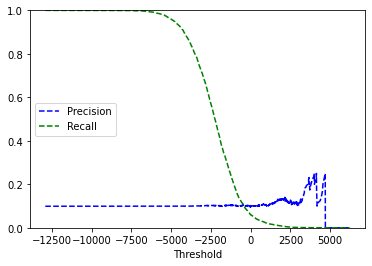

In [215]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.ylim([0,1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [218]:
y_train_pred_90 = (y_scores > 3000)
precision_score(y_train_5, y_train_pred_90), recall_score(y_train_5, y_train_pred_90)

(0.11428571428571428, 0.0013447638258530846)

# Aula 8: Metricas de Performance III: Curva ROC

In [219]:
logreg = LogisticRegression()
logreg.fit(Xtrain, ytrain)

LogisticRegression()

In [220]:
from sklearn.metrics import roc_curve

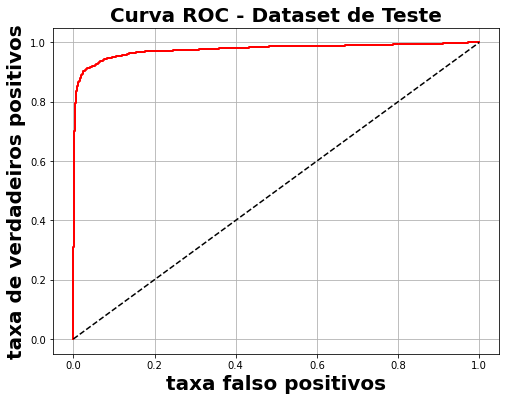

In [237]:
fpr, tpr, thresholds = roc_curve(y_true=ytest, y_score=logreg.predict_proba(Xtest.values)[:, 1])

plt.figure(figsize=[8,6])
plt.plot(fpr, tpr, c='red', label='F1 Médio - Treino', lw=2)
plt.grid()
plt.xlabel("taxa falso positivos", fontsize=20, fontweight='bold')
plt.ylabel("taxa de verdadeiros positivos", fontsize=20, fontweight='bold')
plt.title("Curva ROC - Dataset de Teste",  fontsize=20, fontweight='bold')
plt.plot([0,1], [0,1], 'k--')
plt.show()

In [238]:
from sklearn.metrics import roc_auc_score

In [240]:
roc_auc_score(ytest, logreg.predict_proba(Xtest)[:, 1])

0.9765502102835436

In [241]:
random_classifier = np.random.choice(a = [0,1], size= ytest.size, replace=True)

roc_auc_score(ytest, random_classifier)

0.5144851444851444

# Aula 9: Classificação Multiclasse

In [243]:
X, y = mnist['data'], mnist['target'].astype(float)
print(X.shape, y.shape)
print(np.unique(y))

(70000, 784) (70000,)
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


In [244]:
Xtrain, Xtest, ytrain, ytest = X[:55000], X[55000:], y[:55000], y[55000:]

In [245]:
logreg = LogisticRegression(multi_class='ovr')
logreg.fit(Xtrain, ytrain)


LogisticRegression(multi_class='ovr')

In [246]:
logreg.predict(Xtest)[:20]


array([1., 4., 8., 7., 4., 4., 0., 9., 3., 9., 5., 3., 6., 9., 1., 1., 6.,
       3., 6., 6.])

In [251]:
pd.DataFrame(np.c_[logreg.predict_proba(Xtest), logreg.predict(Xtest)]).round(4).head(20)



,0,1,2,3,4,5,6,7,8,9,10
0,0.0004,0.8594,0.0539,0.0163,0.0015,0.0007,0.0016,0.0021,0.0637,0.0004,1.0
1,0.0000,0.0000,0.4685,0.0092,0.5196,0.0021,0.0006,0.0000,0.0000,0.0000,4.0
2,0.0030,0.0041,0.0003,0.0315,0.0000,0.3155,0.0001,0.0000,0.6452,0.0004,8.0
3,0.0142,0.0000,0.0000,0.0006,0.0026,0.0002,0.0000,0.7674,0.0000,0.2150,7.0
4,0.0000,0.0000,0.0000,0.0000,0.9019,0.0180,0.0000,0.0005,0.0726,0.0070,4.0
5,0.0001,0.0000,0.0117,0.0000,0.8111,0.0002,0.0199,0.0001,0.1564,0.0005,4.0
6,0.9631,0.0000,0.0001,0.0006,0.0000,0.0000,0.0017,0.0000,0.0345,0.0000,0.0
7,0.0005,0.0000,0.0000,0.0000,0.0034,0.0022,0.0000,0.0016,0.0191,0.9732,9.0
8,0.0000,0.0000,0.0004,0.9995,0.0000,0.0000,0.0000,0.0000,0.0001,0.0000,3.0
9,0.0000,0.0000,0.0000,0.0000,0.0174,0.0000,0.0000,0.0080,0.0002,0.9744,9.0


In [256]:
pd.DataFrame(
    confusion_matrix(ytest, logreg.predict(Xtest)),
    columns= ['pred_digito ' + str(i) for i in range(10)],
    index= ['digito_real ' + str(i) for i in range(10)]
)

,pred_digito 0,pred_digito 1,pred_digito 2,pred_digito 3,pred_digito 4,pred_digito 5,pred_digito 6,pred_digito 7,pred_digito 8,pred_digito 9
digito_real 0,1427,0,4,4,3,3,11,5,9,3
digito_real 1,0,1637,4,1,0,1,4,1,16,1
digito_real 2,9,13,1362,28,13,7,13,16,61,3
digito_real 3,5,2,29,1383,4,33,6,12,34,11
digito_real 4,2,8,6,4,1385,0,12,4,17,43
digito_real 5,19,4,4,60,12,1148,28,9,49,17
digito_real 6,10,4,10,3,5,16,1382,1,9,0
digito_real 7,4,8,26,9,9,1,1,1483,4,46
digito_real 8,11,25,11,31,15,40,9,18,1287,21
digito_real 9,10,8,4,20,42,3,0,38,25,1342


In [257]:
precision_score(ytest, logreg.predict(Xtest), average=None)

array([0.95323981, 0.9578701 , 0.93287671, 0.8963059 , 0.93077957,
       0.91693291, 0.94270123, 0.93446755, 0.85175381, 0.90248823])

In [258]:
recall_score(ytest, logreg.predict(Xtest), average=None)

array([0.97140912, 0.98318318, 0.89311475, 0.91046741, 0.93517893,
       0.85037037, 0.95972222, 0.93211816, 0.876703  , 0.89946381])

In [260]:
f1_score(ytest, logreg.predict(Xtest), average=None)

array([0.96223871, 0.97036159, 0.91256281, 0.90333116, 0.93297407,
       0.88239816, 0.95113558, 0.93329138, 0.86404834, 0.90097348])

In [264]:
prec_final = precision_score(ytest, logreg.predict(Xtest), average=None).mean()
recall_final = recall_score(ytest, logreg.predict(Xtest), average=None).mean()
f1_score_final = f1_score(ytest, logreg.predict(Xtest), average=None).mean()

print(f"Precision final média: {prec_final.round(4)}")
print(f"Recall final média: {recall_final.round(4)}")
print(f"F1 final média: {f1_score_final.round(4)}")

Precision final média: 0.9219
Recall final média: 0.9212
F1 final média: 0.9213


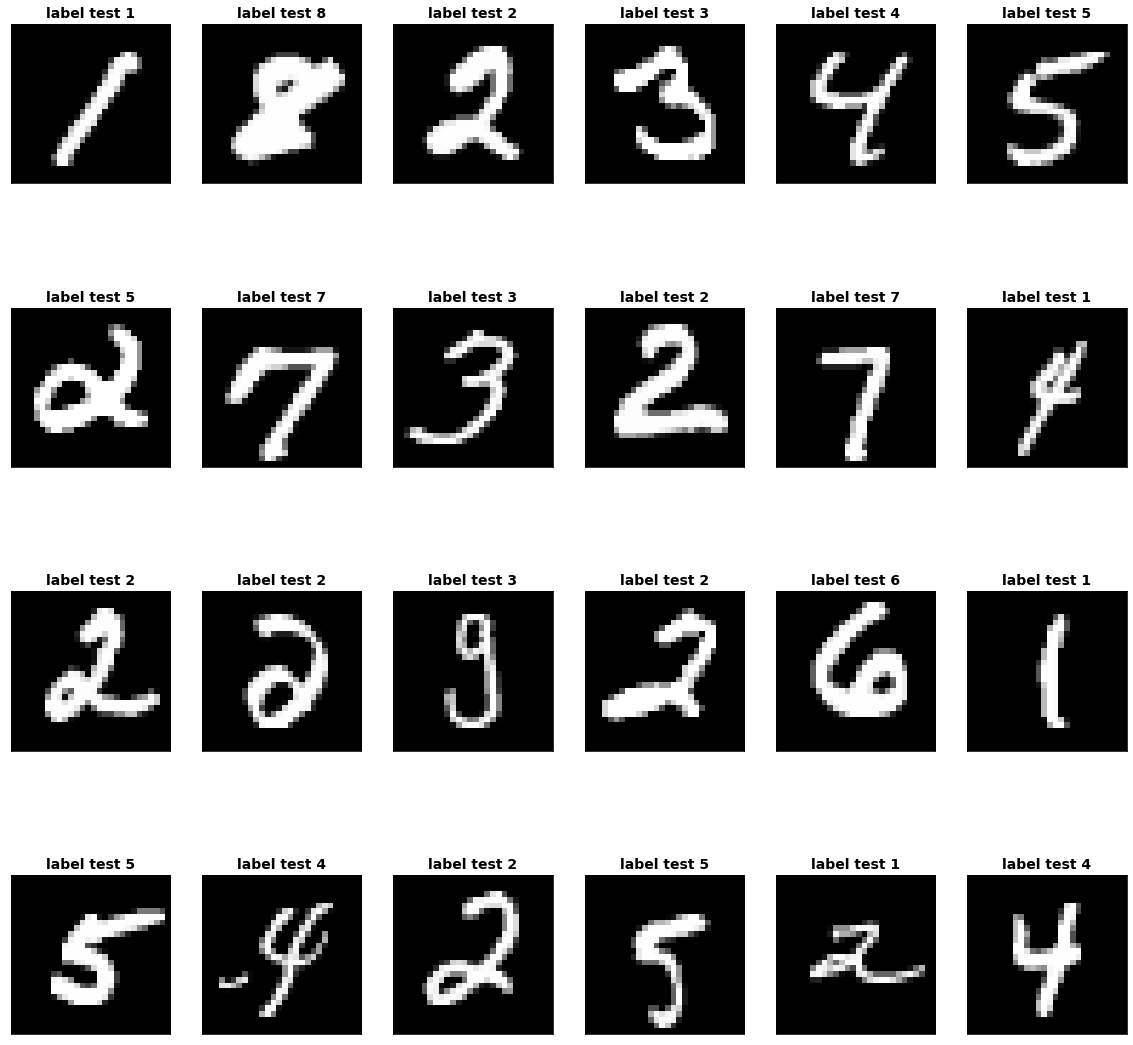

In [269]:
random_idx = np.random.randint(0, Xtest.shape[0], size=24)

plt.figure(figsize=[20,20])

for i in range(len(random_idx)):
    idx_i = random_idx[i]
    
    xval = Xtest.values[idx_i, :].reshape(28,28)

    plt.subplot(4,6, i+1)
    plt.imshow(xval, cmap=plt.cm.Greys_r)
    plt.xticks([])
    plt.yticks([])

    plt.title('label test '+ str(int(logreg.predict(Xtest.values[idx_i, :].reshape(1, -1))[0])), fontsize=14, fontweight='bold')